In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression;
from sklearn.model_selection import train_test_split

# Read the data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
df.head() # Return first five rows
df.info() # Show how many non-null data
df.describe() # Summary statistics of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.columns.values # Return array of column names

array(['39', ' State-gov', ' 77516', ' Bachelors', ' 13',
       ' Never-married', ' Adm-clerical', ' Not-in-family', ' White',
       ' Male', ' 2174', ' 0', ' 40', ' United-States', ' <=50K'],
      dtype=object)

In [2]:
# Fill NA (data processing)

df.isnull().values.any()
df = df.fillna(" ")
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df.isnull().sum())

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Duplicate (Data Processing)
df1 = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(df1)

# Drop duplicate (the count should be different with the previous dataframe)
df1=df.drop_duplicates()
df1.info() # 32536 , 15 (rows, columns)
print(df1.shape)

Duplicate Rows except first occurrence based on all columns are :
       39          State-gov   77516      Bachelors   13        Never-married  \
4880   25            Private  308144      Bachelors   13        Never-married   
5103   90            Private   52386   Some-college   10        Never-married   
9170   21            Private  250051   Some-college   10        Never-married   
11630  20            Private  107658   Some-college   10        Never-married   
13083  25            Private  195994        1st-4th    2        Never-married   
15058  21            Private  243368      Preschool    1        Never-married   
17039  46            Private  173243        HS-grad    9   Married-civ-spouse   
18554  30            Private  144593        HS-grad    9        Never-married   
18697  19            Private   97261        HS-grad    9        Never-married   
21317  19            Private  138153   Some-college   10        Never-married   
21489  19            Private  146679   Some

In [5]:
# Creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df1[' State-gov'] = labelencoder.fit_transform(df1[' State-gov'])
df1[' Bachelors'] = labelencoder.fit_transform(df1[' Bachelors'])
df1[' Never-married'] = labelencoder.fit_transform(df1[' Never-married'])
df1[' Adm-clerical'] = labelencoder.fit_transform(df1[' Adm-clerical'])
df1[' Not-in-family'] = labelencoder.fit_transform(df1[' Not-in-family'])
df1[' White'] = labelencoder.fit_transform(df1[' White'])
df1[' Male'] = labelencoder.fit_transform(df1[' Male'])
df1[' United-States'] = labelencoder.fit_transform(df1[' United-States'])
df1[' <=50K'] = labelencoder.fit_transform(df1[' <=50K'])
df1.info() #float64(6), int32(3), int64(20)
print(df1.shape) #(512.248, 29), (512248, 29)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   39              32536 non-null  int64
 1    State-gov      32536 non-null  int64
 2    77516          32536 non-null  int64
 3    Bachelors      32536 non-null  int64
 4    13             32536 non-null  int64
 5    Never-married  32536 non-null  int64
 6    Adm-clerical   32536 non-null  int64
 7    Not-in-family  32536 non-null  int64
 8    White          32536 non-null  int64
 9    Male           32536 non-null  int64
 10   2174           32536 non-null  int64
 11   0              32536 non-null  int64
 12   40             32536 non-null  int64
 13   United-States  32536 non-null  int64
 14   <=50K          32536 non-null  int64
dtypes: int64(15)
memory usage: 4.0 MB
(32536, 15)


<ipython-input-5-47f6c7d8dbdb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[' State-gov'] = labelencoder.fit_transform(df1[' State-gov'])
<ipython-input-5-47f6c7d8dbdb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[' Bachelors'] = labelencoder.fit_transform(df1[' Bachelors'])
<ipython-input-5-47f6c7d8dbdb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [7]:
# Final dataset
data_final_df1 = df1
data_final_df1.columns.values
data_final_df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   39              32536 non-null  int64
 1    State-gov      32536 non-null  int64
 2    77516          32536 non-null  int64
 3    Bachelors      32536 non-null  int64
 4    13             32536 non-null  int64
 5    Never-married  32536 non-null  int64
 6    Adm-clerical   32536 non-null  int64
 7    Not-in-family  32536 non-null  int64
 8    White          32536 non-null  int64
 9    Male           32536 non-null  int64
 10   2174           32536 non-null  int64
 11   0              32536 non-null  int64
 12   40             32536 non-null  int64
 13   United-States  32536 non-null  int64
 14   <=50K          32536 non-null  int64
dtypes: int64(15)
memory usage: 4.0 MB


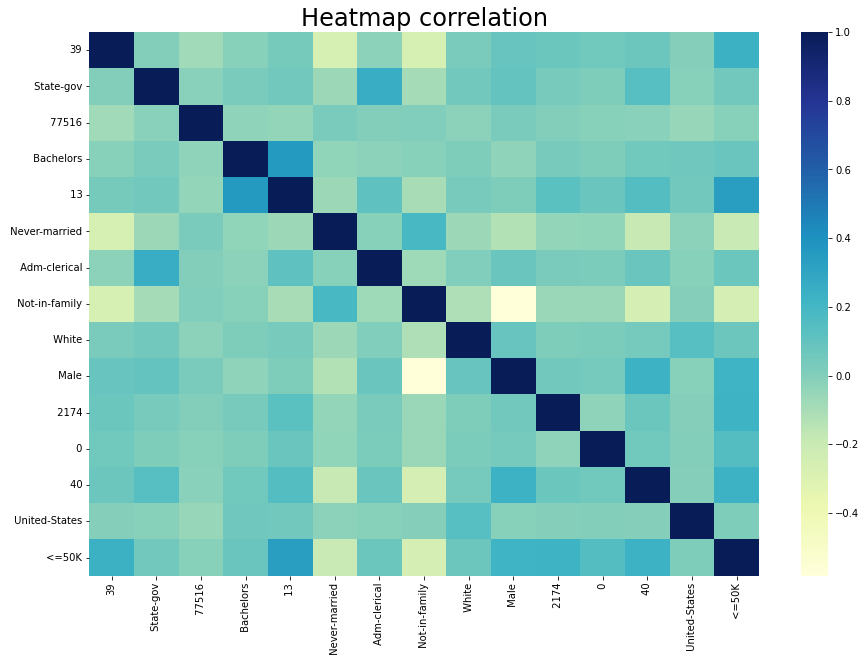

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
39,1.000000,0.003781,-0.076448,-0.010551,0.036224,-0.266142,-0.020911,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.001524,0.234039
State-gov,0.003781,1.000000,-0.016532,0.023480,0.052099,-0.064828,0.255105,-0.090421,0.049717,0.095960,0.033845,0.012255,0.139059,-0.007697,0.051706
77516,-0.076448,-0.016532,1.000000,-0.028065,-0.043353,0.028154,0.001360,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.051866,-0.009521
Bachelors,-0.010551,0.023480,-0.028065,1.000000,0.359105,-0.038413,-0.021249,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.063874,0.079361
13,0.036224,0.052099,-0.043353,0.359105,1.000000,-0.069196,0.109804,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.050127,0.335299
Never-married,-0.266142,-0.064828,0.028154,-0.038413,-0.069196,1.000000,-0.009778,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.023414,-0.199187
Adm-clerical,-0.020911,0.255105,0.001360,-0.021249,0.109804,-0.009778,1.000000,-0.075600,0.006811,0.080532,0.025513,0.017977,0.080502,-0.012394,0.075398
Not-in-family,-0.263744,-0.090421,0.008859,-0.011060,-0.094424,0.185542,-0.075600,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.005634,-0.250955
White,0.029116,0.049717,-0.021484,0.014307,0.031998,-0.067942,0.006811,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.137847,0.071855
Male,0.088708,0.095960,0.027113,-0.027426,0.012181,-0.129425,0.080532,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,-0.008262,0.215984


In [8]:
import matplotlib.pyplot as plt
import seaborn

# Matrix Correlation
data_final_df1_corr = data_final_df1.corr()
plt.figure(figsize=(15,10))
seaborn.heatmap(data_final_df1_corr, cmap="YlGnBu")
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()
# print(data_final_df1_corr)
df1.corr(method ='pearson')

In [9]:
def extractInputOutput(data, output_column_name):
    
    data_output = data[output_column_name] 
    data_input = data.drop(output_column_name, axis = 1)
    
    return data_input, data_output

x, y = extractInputOutput(data_final_df1, ' <=50K')
x.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name:  <=50K, dtype: int64

In [ ]:
df1.to_csv("result2_df3.csv") 

In [10]:
y.head()
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 32536 entries, 0 to 32559
Series name:  <=50K
Non-Null Count  Dtype
--------------  -----
32536 non-null  int64
dtypes: int64(1)
memory usage: 508.4 KB


In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   39              32536 non-null  int64
 1    State-gov      32536 non-null  int64
 2    77516          32536 non-null  int64
 3    Bachelors      32536 non-null  int64
 4    13             32536 non-null  int64
 5    Never-married  32536 non-null  int64
 6    Adm-clerical   32536 non-null  int64
 7    Not-in-family  32536 non-null  int64
 8    White          32536 non-null  int64
 9    Male           32536 non-null  int64
 10   2174           32536 non-null  int64
 11   0              32536 non-null  int64
 12   40             32536 non-null  int64
 13   United-States  32536 non-null  int64
dtypes: int64(14)
memory usage: 3.7 MB


In [13]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import os
import sklearn
import itertools
import seaborn
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, log_loss
# from sklearn.externals import joblib
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn import svm

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)
pd.Series(y_test).value_counts()
pd.Series(y_train).value_counts()

#Accuracy Score
def score(y_test, y_pred):
    print("Confusion Matrx:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Recall Score:", recall_score(y_test,y_pred))
    print("Precision Score:", precision_score(y_test,y_pred))
    print("F1 - Score:", f1_score(y_test, y_pred))
    print("MCC Score:", matthews_corrcoef(y_test,y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_pred))

Best Accuracy 0.8632272228320528
Best Param {'n_estimators': 1000, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


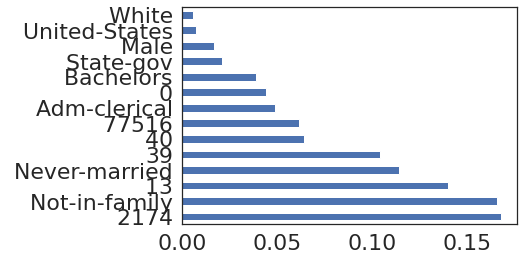

Confusion Matrx:
[[7013  427]
 [ 883 1438]]
Accuracy Score: 0.8657924392992521
Recall Score: 0.6195605342524774
Precision Score: 0.7710455764075067
F1 - Score: 0.6870520783564261
MCC Score: 0.6087615556531145
AUC Score: 0.7810840305670989


In [14]:
# ------------- Random Forest
import gc
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

def randomForest_fit(x_train, y_train, scoring = 'accuracy'):
    randomForest = RandomForestClassifier(random_state=123)

    hyperparam = {'min_samples_leaf': [3, 5, 7, 9, 13, 17, 21, 27, 33, 41, 50, 60, 80, 100],
                  'max_features': ['sqrt', 'log2', 0.25, 0.5, 0.75], 
                  'n_estimators': [100, 200, 300, 500, 750, 1000]}
    
    random_randomForest = RandomizedSearchCV(randomForest, param_distributions = hyperparam, cv = 5, 
                                           n_iter = 6, scoring = scoring, n_jobs=-1, random_state = 123)
    random_randomForest.fit(x_train, y_train)
    
    print ("Best Accuracy", random_randomForest.best_score_)
    print ("Best Param", random_randomForest.best_params_)
    gc.collect()
    return random_randomForest

best_randForest = randomForest_fit(x_train, y_train)
randForest = RandomForestClassifier(random_state=123, n_jobs = -1,
                                   min_samples_leaf = best_randForest.best_params_.get('min_samples_leaf'),
                                   max_features = best_randForest.best_params_.get('max_features'),
                                   n_estimators = best_randForest.best_params_.get('n_estimators'))
randForest.fit(x_train, y_train)

# Importance RF
feat_importances_rf = pd.Series(randForest.feature_importances_, index=x_test.columns)
feat_importances_rf.nlargest(18).plot(kind='barh')
plt.show()
              
y_pred_rf = randForest.predict(x_test)
score(y_test, y_pred_rf)

In [15]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create a model as an instance of LinearRegression
lr = LinearRegression() 
# Fit the model with the observations or data points from the given data frame
lr = lr.fit(x_train, y_train)
# Predict Output
y_pred2=lr.predict(x_test)
# Accuracy check
r_sq = r2_score(y_train, lr.predict(x_train)) # You can obtain the coefficient of determination, 𝑅², with r2_score( ) called on model to check train accuracy
print(r_sq)
r_sq = r2_score(y_test, lr.predict(x_test)) # You can obtain the coefficient of determination, 𝑅², with r2_score( ) called on model to check test accuracy
print(r_sq) 

0.26429305065616504
0.25652123352062584


In [16]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr=logr.fit(x_train, y_train)

# Predict Output
y_pred1=logr.predict(x_test)
# Accuracy check
r_sq = r2_score(y_train, logr.predict(x_train)) 
print(r_sq)
r_sq = r2_score(y_test, logr.predict(x_test)) 
print(r_sq) 

-0.16094370874036712
-0.16669122041389284


In [17]:
from sklearn.naive_bayes import GaussianNB  
NB = GaussianNB()  
NB.fit(x_train, y_train)  
y_pred = NB.predict(x_test)  

# Accuracy check
r_sq = r2_score(y_train, NB.predict(x_train)) 
print(r_sq)
r_sq = r2_score(y_test, NB.predict(x_test)) 
print(r_sq) 

-0.11430505542261438
-0.10960022561650762


In [18]:
from sklearn.tree import DecisionTreeRegressor

# Create a model as an instance of Support vector regressor
dtr = DecisionTreeRegressor() 
# Fit the model with the observations or data points from the given data frame
dtr = dtr.fit(x_train, y_train)
# Predict Output
y_pred2=dtr.predict(x_test)
# Accuracy check
r_sq = r2_score(y_train, dtr.predict(x_train)) 
print(r_sq)
r_sq = r2_score(y_test, dtr.predict(x_test)) 
print(r_sq) 

1.0
-0.08303312902762539


In [19]:
from sklearn.neighbors import KNeighborsRegressor
# Create a model as an instance of KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)#fix k=3
# Fit the model with the observations or data points from the given data frame
knn= knn.fit(x_train, y_train)
# Predict Output
y_pred4=knn.predict(x_test)
# Accuracy check
r_sq = r2_score(y_train, knn.predict(x_train)) 
print(r_sq)
r_sq = r2_score(y_test, knn.predict(x_test)) 
print(r_sq) 

0.488649021572537
-0.06324912092952162
